# RamPrice

In [ ]:
import pandas as pd
from datetime import date
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Чтобы ошибки не мозолили глаза
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def pandas_info(data):
    '''
    список всех данных в пандасе
    '''
    print(*[data.info(), data.describe(), data.index], sep="\n-----------------------\n")

In [ ]:
def create_posix(data, freq=None):
    data_freq = pd.date_range(start=data.index.min(), end=data.index.max(), freq=freq)
    data_posix = np.array(data_freq.astype(int) // 10 ** 9).reshape(-1,1)
    return data_posix

# Функция разделения на обуч. и тестовые выборки
def train_test_split_dt(data_posix, data_pd, year, freq=None):

    X_all = data_posix.loc[data_pd.index]
    X_all = create_posix(X_all, freq)

    y_all = data_pd.loc[data_pd.index]
    y_all = np.array(y_all).reshape(-1, data_pd.shape[1])
    y_all = y_all[:-1]

    X_train = data_posix.loc[data_pd.index < year]
    X_train = create_posix(X_train, freq)

    y_train = data_pd.loc[data_pd.index < year]
    y_train = np.array(y_train).reshape(-1, data_pd.shape[1])
    y_train = y_train[:-1]

    X_test = data_posix.loc[data_pd.index > year]
    X_test = create_posix(X_test, freq)
#     X_test = np.array(X_test.index).reshape(-1,1)

    y_test = data_pd.loc[data_pd.index > year]
    y_test = np.array(y_test).reshape(-1, data_pd.shape[1])
    y_test = y_test[:-1]
    return X_train, y_train, X_test, y_test, X_all, y_all

In [ ]:
data = pd.read_csv('BigRamPrice2.csv', sep=';')
#, 'tupe_ram', 'max_stick', 'maks_desktop_gb']
data_1 = data.loc[:,'Date':'processnodes(nm)'].copy()
data_2 = data.loc[:,'tupe_ram':'maks_desktop_gb'].copy()

data = pd.concat([data_1, data_2], axis=1)

In [ ]:
pandas_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              670 non-null    object 
 1   price_ram         670 non-null    float64
 2   Price_gold        670 non-null    float64
 3   processnodes(nm)  670 non-null    int64  
 4   tupe_ram          214 non-null    float64
 5   max_stick         214 non-null    float64
 6   maks_desktop_gb   214 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 36.8+ KB
None
-----------------------
          price_ram   Price_gold  processnodes(nm)    tupe_ram   max_stick  \
count  6.700000e+02   670.000000        670.000000  214.000000  214.000000   
mean   5.528262e+05   407.063288       3073.673134    2.317757    7.158879   
std    1.209703e+06   400.669376       3872.270711    0.993860    8.983187   
min    3.700000e-03    34.946000         14.000000    1.000000    1.0

In [ ]:
data

,Date,price_ram,Price_gold,processnodes(nm),tupe_ram,max_stick,maks_desktop_gb
0,1960-01,5.242880e+06,35.090,10000,NaN,NaN,NaN
1,1960-02,5.199539e+06,35.090,10000,NaN,NaN,NaN
2,1960-03,5.156198e+06,35.090,10000,NaN,NaN,NaN
3,1960-04,5.112857e+06,35.110,10000,NaN,NaN,NaN
4,1960-05,5.069515e+06,35.100,10000,NaN,NaN,NaN
...,...,...,...,...,...,...,...
665,2015-06,5.050000e-03,1182.248,14,4.0,32.0,128.0
666,2015-07,4.500000e-03,1131.580,14,4.0,32.0,128.0
667,2015-08,4.400000e-03,1117.525,14,4.0,32.0,128.0
668,2015-09,4.300000e-03,1124.905,14,4.0,32.0,128.0


# Сократим данные
В данных много Nan и старых данных до 2000 года, поэтому отбросим их.

Это позволит избавиться от старых данных, которые будут портить прогноз

In [ ]:
data = data.dropna()
data = data.drop(['max_stick'], axis=1)

In [ ]:
# 1
data

,Date,price_ram,Price_gold,processnodes(nm),tupe_ram,maks_desktop_gb
456,1998-01,0.91000,289.264,250,1.0,4.0
457,1998-02,0.94000,297.743,250,1.0,4.0
458,1998-03,0.97000,295.870,250,1.0,4.0
459,1998-04,1.22000,308.558,250,1.0,4.0
460,1998-05,1.19000,298.971,250,1.0,4.0
...,...,...,...,...,...,...
665,2015-06,0.00505,1182.248,14,4.0,128.0
666,2015-07,0.00450,1131.580,14,4.0,128.0
667,2015-08,0.00440,1117.525,14,4.0,128.0
668,2015-09,0.00430,1124.905,14,4.0,128.0


# Кореляция признаков

 матрицу с коэффициентами корреляции признаков

                  price_ram  Price_gold  processnodes(nm)  tupe_ram  \
price_ram          1.000000   -0.575053          0.860848 -0.696808   
Price_gold        -0.575053    1.000000         -0.777211  0.824453   
processnodes(nm)   0.860848   -0.777211          1.000000 -0.888802   
tupe_ram          -0.696808    0.824453         -0.888802  1.000000   
maks_desktop_gb   -0.393579    0.577608         -0.578750  0.806236   

                  maks_desktop_gb  
price_ram               -0.393579  
Price_gold               0.577608  
processnodes(nm)        -0.578750  
tupe_ram                 0.806236  
maks_desktop_gb          1.000000  


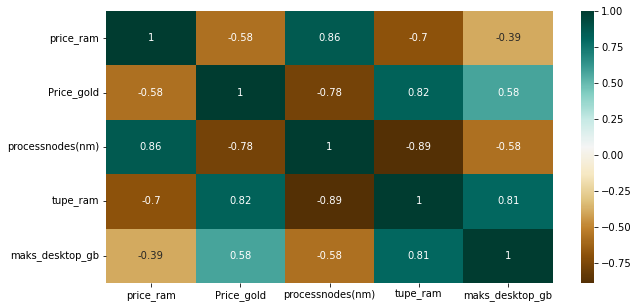

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,5))
CorrKoef = data.corr()
sns.heatmap(CorrKoef,cmap="BrBG",annot=True)
print(CorrKoef)


Следующим шагом мы найдем поля которые коррелируют между собой (у которых коэффициент корреляции больше 90%), используя нашу матрицу:


In [ ]:
CorField = []
for i in CorrKoef:
    for j in CorrKoef.index[CorrKoef[i] > 0.8]:
        if i > j and j not in CorField and i not in CorField:
            CorField.append(j)
            print ("%s-->%s: r^2=%f" % (i,j, CorrKoef[i][CorrKoef.index==j].values[0]))

processnodes(nm)-->price_ram: r^2=0.860848
tupe_ram-->Price_gold: r^2=0.824453
tupe_ram-->maks_desktop_gb: r^2=0.806236


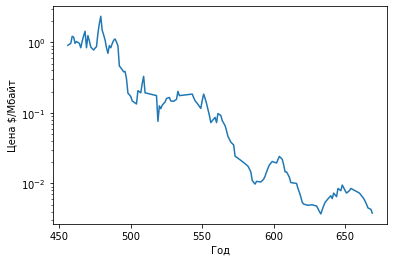

In [ ]:
plt.semilogy(data.price_ram)
plt.xlabel("Год")
plt.ylabel("Цена $/Мбайт");

# Предобработка (Preprocessing)
## Создание даты
Здесь мы будем преобразовывать даты с нормальный формат, и логарифмировать цены

In [ ]:
df = data
date_indexs = np.log(data.price_ram + 1)
df['price_ram'] = pd.DataFrame(date_indexs)
df

,Date,price_ram,Price_gold,processnodes(nm),tupe_ram,maks_desktop_gb
456,1998-01,0.647103,289.264,250,1.0,4.0
457,1998-02,0.662688,297.743,250,1.0,4.0
458,1998-03,0.678034,295.870,250,1.0,4.0
459,1998-04,0.797507,308.558,250,1.0,4.0
460,1998-05,0.783902,298.971,250,1.0,4.0
...,...,...,...,...,...,...
665,2015-06,0.005037,1182.248,14,4.0,128.0
666,2015-07,0.004490,1131.580,14,4.0,128.0
667,2015-08,0.004390,1117.525,14,4.0,128.0
668,2015-09,0.004291,1124.905,14,4.0,128.0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index(['Date'])
df_1 = df

In [ ]:
df

,price_ram,Price_gold,processnodes(nm),tupe_ram,maks_desktop_gb
Date,,,,,
1998-01-01,0.647103,289.264,250,1.0,4.0
1998-02-01,0.662688,297.743,250,1.0,4.0
1998-03-01,0.678034,295.870,250,1.0,4.0
1998-04-01,0.797507,308.558,250,1.0,4.0
1998-05-01,0.783902,298.971,250,1.0,4.0
...,...,...,...,...,...
2015-06-01,0.005037,1182.248,14,4.0,128.0
2015-07-01,0.004490,1131.580,14,4.0,128.0
2015-08-01,0.004390,1117.525,14,4.0,128.0


Проверка на стационарность

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Prepro_data_np = np.array(Prepro_data_pd.values)

res = adfuller(df.price_ram, autolag='BIC') 
if res[1] > 0.05:          # 0.05 - гипотеза 5%
        print('Временной ряд НЕ стационарный')  # сравнение с p-value
else:
        print('Временной ряд стационарный')

Временной ряд НЕ стационарный


## Создаём первую обучающую выборку

Сделаем тетсовые и обучающие выборки:<br>
    Обуч.: с 1990-2013гг.<br>
    Тест.: с 2013-2015гг.

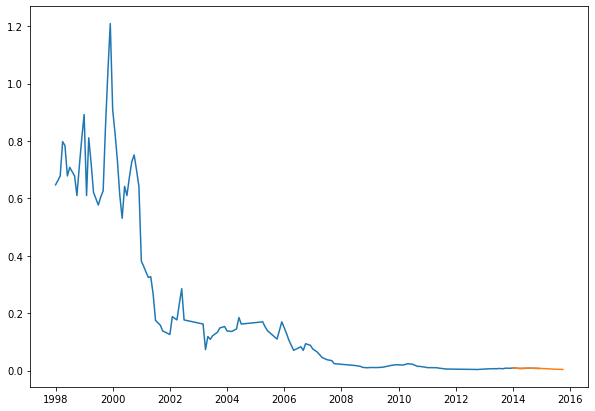

In [ ]:
data_2 = df.loc[:'2014']
data_3 = df.loc['2014':]

fig, ax2 = plt.subplots(1,figsize=(10,7))
ax2.plot(data_2.price_ram)
ax2.plot(data_3.price_ram);

In [ ]:
data_3.price_ram

Date
2014-01-01    0.009455
2014-02-01    0.008662
2014-03-01    0.007869
2014-04-01    0.007273
2014-05-01    0.007571
2014-06-01    0.007869
2014-07-01    0.008464
2014-08-01    0.008266
2014-09-01    0.008067
2014-10-01    0.007869
2014-11-01    0.007671
2014-12-01    0.007472
2015-01-01    0.007273
2015-02-01    0.006876
2015-03-01    0.006479
2015-04-01    0.006081
2015-05-01    0.005584
2015-06-01    0.005037
2015-07-01    0.004490
2015-08-01    0.004390
2015-09-01    0.004291
2015-10-01    0.003793
Name: price_ram, dtype: float64

## Поквартальные точки

In [ ]:
xticks = pd.date_range(start=df.index.min(), end=df.index.max(), freq='Q')
xticks

DatetimeIndex(['1998-03-31', '1998-06-30', '1998-09-30', '1998-12-31',
               '1999-03-31', '1999-06-30', '1999-09-30', '1999-12-31',
               '2000-03-31', '2000-06-30', '2000-09-30', '2000-12-31',
               '2001-03-31', '2001-06-30', '2001-09-30', '2001-12-31',
               '2002-03-31', '2002-06-30', '2002-09-30', '2002-12-31',
               '2003-03-31', '2003-06-30', '2003-09-30', '2003-12-31',
               '2004-03-31', '2004-06-30', '2004-09-30', '2004-12-31',
               '2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31', '2006-06-30', '2006-09-30', '2006-12-31',
               '2007-03-31', '2007-06-30', '2007-09-30', '2007-12-31',
               '2008-03-31', '2008-06-30', '2008-09-30', '2008-12-31',
               '2009-03-31', '2009-06-30', '2009-09-30', '2009-12-31',
               '2010-03-31', '2010-06-30', '2010-09-30', '2010-12-31',
               '2011-03-31', '2011-06-30', '2011-09-30', '2011-12-31',
      

Перевод в дат в posix формат

UNIX time - числовое представление* дат в виде чисел в секундах (каждую дату мы переводим в секунды) <br>
*Сделано для улучшения работы машины

In [ ]:
xticks1 = xticks.astype('int64') // 10 ** 9
xticks1 = np.array(xticks1)
xticks1

array([ 891302400,  899164800,  907113600,  915062400,  922838400,
        930700800,  938649600,  946598400,  954460800,  962323200,
        970272000,  978220800,  985996800,  993859200, 1001808000,
       1009756800, 1017532800, 1025395200, 1033344000, 1041292800,
       1049068800, 1056931200, 1064880000, 1072828800, 1080691200,
       1088553600, 1096502400, 1104451200, 1112227200, 1120089600,
       1128038400, 1135987200, 1143763200, 1151625600, 1159574400,
       1167523200, 1175299200, 1183161600, 1191110400, 1199059200,
       1206921600, 1214784000, 1222732800, 1230681600, 1238457600,
       1246320000, 1254268800, 1262217600, 1269993600, 1277856000,
       1285804800, 1293753600, 1301529600, 1309392000, 1317340800,
       1325289600, 1333152000, 1341014400, 1348963200, 1356912000,
       1364688000, 1372550400, 1380499200, 1388448000, 1396224000,
       1404086400, 1412035200, 1419984000, 1427760000, 1435622400,
       1443571200], dtype=int64)

Перевод posix данных в Pandas-формат

In [ ]:
df_1 = df.copy()
df_1.index = pd.to_datetime(df.index).astype("int64") // 10**9
df_1.index

Int64Index([ 883612800,  886291200,  888710400,  891388800,  893980800,
             896659200,  899251200,  901929600,  904608000,  907200000,
            ...
            1420070400, 1422748800, 1425168000, 1427846400, 1430438400,
            1433116800, 1435708800, 1438387200, 1441065600, 1443657600],
           dtype='int64', name='Date', length=214)

In [ ]:
df_1

,price_ram,Price_gold,processnodes(nm),tupe_ram,maks_desktop_gb
Date,,,,,
883612800,0.647103,289.264,250,1.0,4.0
886291200,0.662688,297.743,250,1.0,4.0
888710400,0.678034,295.870,250,1.0,4.0
891388800,0.797507,308.558,250,1.0,4.0
893980800,0.783902,298.971,250,1.0,4.0
...,...,...,...,...,...
1433116800,0.005037,1182.248,14,4.0,128.0
1435708800,0.004490,1131.580,14,4.0,128.0
1438387200,0.004390,1117.525,14,4.0,128.0


## Создаём массив X с посикс данными

In [ ]:
X = np.array(df_1.index)
X = X.reshape(-1,1)
X[:5]

array([[883612800],
       [886291200],
       [888710400],
       [891388800],
       [893980800]], dtype=int64)

# Создание датафрейма

Создаём данные из восстановленных с помощью регрессии данных

In [ ]:
# Prepro_data_pd_1 = pd.Series(
#         data = RFReg_1,
#         index = xticks,
#         name = ('log_price')
# )

In [ ]:
# Prepro_data_pd_1

# Создание даты

Проверим ряд на стационарность

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Prepro_data_np = np.array(Prepro_data_pd.values)

res = adfuller(df_1.price_ram, autolag='t-stat') 
if res[1] > 0.05:          # 0.05 - гипотеза 5%
        print('Временной ряд НЕ стационарный')  # сравнение с p-value
else:
        print('Временной ряд стационарный')

Временной ряд НЕ стационарный


## Разделение данных на тест и обуч выборки в формате Pandas


In [ ]:
from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
y_stolb = df_1[['price_ram']]
X_stolb = df_1.drop(['price_ram'], axis=1)


print(y_stolb)
print(X_stolb)

            price_ram
Date                 
883612800    0.647103
886291200    0.662688
888710400    0.678034
891388800    0.797507
893980800    0.783902
...               ...
1433116800   0.005037
1435708800   0.004490
1438387200   0.004390
1441065600   0.004291
1443657600   0.003793

[214 rows x 1 columns]
            Price_gold  processnodes(nm)  tupe_ram  maks_desktop_gb
Date                                                               
883612800      289.264               250       1.0              4.0
886291200      297.743               250       1.0              4.0
888710400      295.870               250       1.0              4.0
891388800      308.558               250       1.0              4.0
893980800      298.971               250       1.0              4.0
...                ...               ...       ...              ...
1433116800    1182.248                14       4.0            128.0
1435708800    1131.580                14       4.0            128.0
1438387200

In [ ]:
y_stolb_ind = pd.to_datetime(y_stolb.index, unit='s')

y_stolb['Data'] = y_stolb_ind

y_stolb = y_stolb.set_index('Data')

y_stolb

,price_ram
Data,
1998-01-01,0.647103
1998-02-01,0.662688
1998-03-01,0.678034
1998-04-01,0.797507
1998-05-01,0.783902
...,...
2015-06-01,0.005037
2015-07-01,0.004490
2015-08-01,0.004390


In [ ]:
X_stolb_ind = pd.to_datetime(X_stolb.index, unit='s')

X_stolb['Data'] = X_stolb_ind

X_stolb = X_stolb.set_index('Data')

X_stolb

,Price_gold,processnodes(nm),tupe_ram,maks_desktop_gb
Data,,,,
1998-01-01,289.264,250,1.0,4.0
1998-02-01,297.743,250,1.0,4.0
1998-03-01,295.870,250,1.0,4.0
1998-04-01,308.558,250,1.0,4.0
1998-05-01,298.971,250,1.0,4.0
...,...,...,...,...
2015-06-01,1182.248,14,4.0,128.0
2015-07-01,1131.580,14,4.0,128.0
2015-08-01,1117.525,14,4.0,128.0


In [ ]:
Xtrn = X_stolb.loc[:'2014']
Xtest = X_stolb.loc['2014':]


Ytrn = y_stolb.loc[:'2014']
Ytest = y_stolb.loc['2014':]

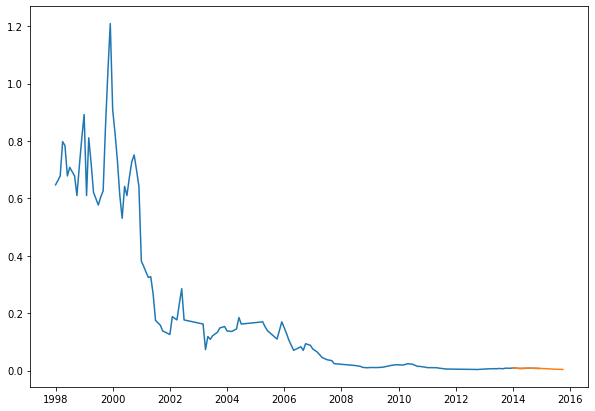

In [ ]:
fig, ax2 = plt.subplots(1,figsize=(10,7))
ax2.plot(Ytrn)
ax2.plot(Ytest);

##Колдуем с предсказаниями 

In [ ]:
models = [LinearRegression(), 
          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
          ]

In [ ]:
Xtrn = np.array(Xtrn)
Xtest = np.array(Xtest)
Ytrn = np.array(Ytrn)
Ytest = np.array(Ytest)
print(Ytrn.shape)
print(Ytest.shape)
print(Xtrn.shape)
print(Xtest.shape)

(204, 1)
(22, 1)
(204, 4)
(22, 4)


In [ ]:
#создаем временные структуры
TestModels = DataFrame()
TestModelsPred = DataFrame()
tmp = {}

#для каждой модели из списка
for model in models:
    #получаем имя модели
    m = str(model)
    tmp['Model'] = m[:m.index('(')]    
    #для каждого столбцам результирующего набора
    for i in range(Ytrn.shape[1]):
        #обучаем модель
        model.fit(Xtrn, Ytrn) 
        #вычисляем коэффициент детерминации
        tmp['R2_Y%s'%str(i+1)] = r2_score(Ytest, model.predict(Xtest))
        pred = model.predict(Xtest)
    #записываем данные и итоговый DataFrame
    pred = model.predict(Xtest)
    TestModels = TestModels.append([tmp])
#делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)

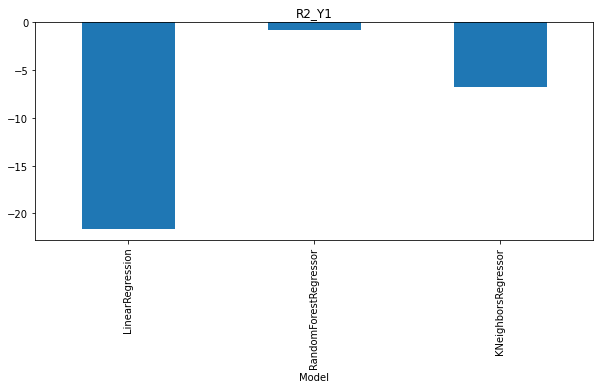

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10,4))
TestModels.R2_Y1.plot(kind='bar', title='R2_Y1');

In [ ]:
model = models[1].fit(Xtrn, Ytrn).feature_importances_

print(model)

[0.35291266 0.511889   0.06864402 0.06655432]


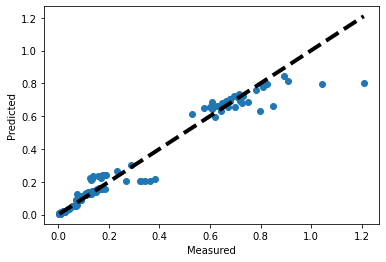

In [ ]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

mod = models[1].fit(Xtrn, Ytrn)
y = df_1[['price_ram']]
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_val_predict(mod, df_1, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


# Высчитывание тренда

Складываем обучающие массива

In [ ]:
X_2 = np.vstack((Xtrn, Xtest))
y_2 = np.vstack((Ytrn, Ytest))
print(X_2.shape, '\n', X_2[:5], '\n\n',
      y_2.shape, '\n', y_2[:5])

(226, 4) 
 [[289.264 250.      1.      4.   ]
 [297.743 250.      1.      4.   ]
 [295.87  250.      1.      4.   ]
 [308.558 250.      1.      4.   ]
 [298.971 250.      1.      4.   ]] 

 (226, 1) 
 [[0.64710324]
 [0.66268797]
 [0.67803354]
 [0.7975072 ]
 [0.78390154]]


In [ ]:
# Находим дифференциа
y_der = np.diff(y_2.ravel())

print(y_der[:10])
print('\n', y_der.shape)

[ 0.01558473  0.01534557  0.11947365 -0.01360565 -0.105868    0.03000225
 -0.01488861 -0.01511364 -0.06826797  0.10318424]

 (225,)


In [ ]:
# y_reduced = y_2[:-1].ravel() - y_der.ravel()
# print(y_reduced.shape)

# fig = plt.figure(figsize = (30, 20))
# plt.plot(X_2, y_2, label = "original")
# plt.plot(X_2[:-1], y_der, label = "derivative") # Производная

# plt.legend();

## Сезонная декомпозиция

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decomposition_plot(ts):

    decomposition = seasonal_decompose(ts)  # логарифмируем исх. данные!!!

# разложение исх. данных на тренд, сезонность и остатки
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    return ts - trend

def decomposition_plot2(ts):
# используем seasonal_decompose из statsmodels.tsa.seasonal

    decomposition = seasonal_decompose(ts)  # логарифмируем исх. данные!!!

# разложение исх. данных на тренд, сезонность и остатки
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

# Plotting
    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(ts, label='Исх. данные НЕ логарифмир.', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Тренд', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Сезонность', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Остатки', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    return trend

Размер массивов

In [ ]:
X_train_2 = X_2
y_train_2 = y_2
print(X_train_2.shape, y_train_2.shape)

X_test_2 = X_2
y_test_2 = y_2
print(X_test_2.shape, y_test_2.shape)

(226, 4) (226, 1)
(226, 4) (226, 1)


Функция экспоненциального скользящего окна

In [ ]:
def numpy_ewma_vectorized(data, window):

    alpha = 2 /(window + 1.0)
    alpha_rev = 1-alpha

    scale = 1/alpha_rev
    n = data.shape[0]

    r = np.arange(n)
    scale_arr = scale**r
    offset = data[0]*alpha_rev**(r+1)
    pw0 = alpha*alpha_rev**(n-1)

    mult = data*pw0*scale_arr
    cumsums = mult.cumsum()
    out = offset + cumsums*scale_arr[::-1]
    return out

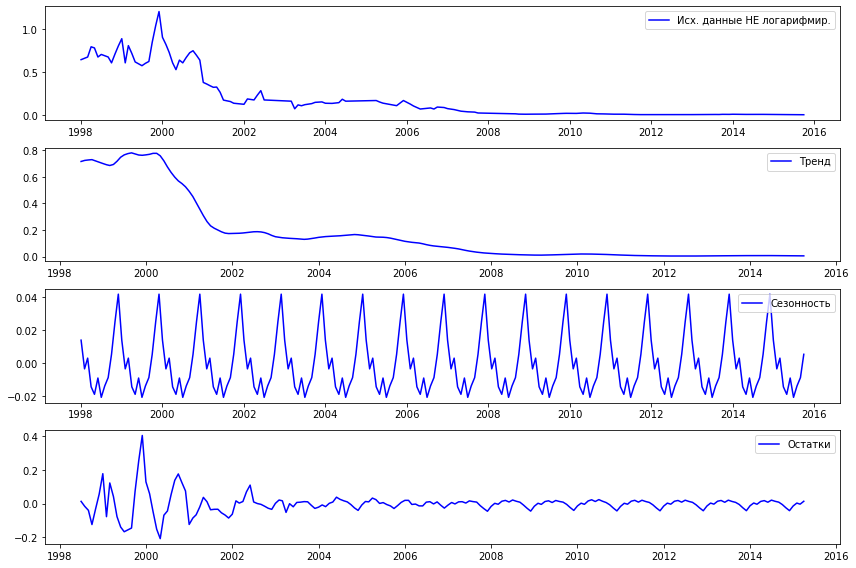

(225,)


In [ ]:
ema = numpy_ewma_vectorized(df["price_ram"], 3)
trend = decomposition_plot2(df["price_ram"]).fillna(method = "bfill").fillna(method = "ffill").to_numpy()
print(y_der.shape)

In [ ]:
print(trend.shape)
print(y_2.shape)


(214,)
(226, 1)


График данных с трендом и без тренда

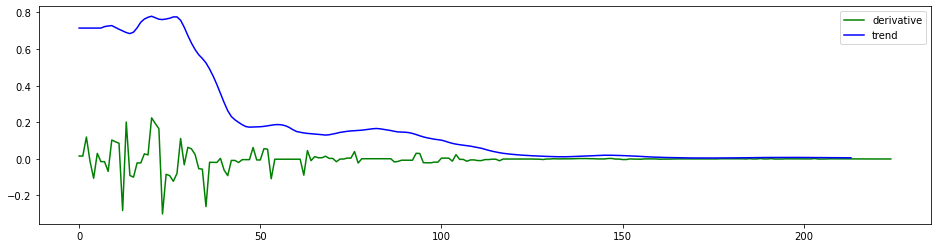

In [ ]:
fig = plt.figure(figsize=(16, 4))
plt.plot(y_der.flatten(), c="g", label = "derivative")
plt.plot(trend.flatten(), c="b", label = "trend")
plt.legend()
plt.show()

In [ ]:
Xtrn 
Xtest = Xtest[:-1,:]
print(Xtrn.shape)
print(Xtest.shape)

Ytrn = y_der[:204]
Ytest = y_der[204:]
print(Ytrn.shape)
print(Ytest.shape)

(204, 4)
(21, 4)
(204,)
(21,)


In [ ]:
#создаем временные структуры
TestModels = DataFrame()
TestModelsPred = DataFrame()
tmp = {}

#для каждой модели из списка
for model in models:
    #получаем имя модели
    m = str(model)
    tmp['Model'] = m[:m.index('(')]    
    #для каждого столбцам результирующего набора
    for i in range(Ytrn.shape[0]):
        #обучаем модель
        model.fit(Xtrn, Ytrn) 
        #вычисляем коэффициент детерминации
        tmp['R2_Y%s'%str(i+1)] = r2_score(Ytest, model.predict(Xtest))
        pred = model.predict(Xtest)
    #записываем данные и итоговый DataFrame
    pred = model.predict(Xtest)
    TestModels = TestModels.append([tmp])
#делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)

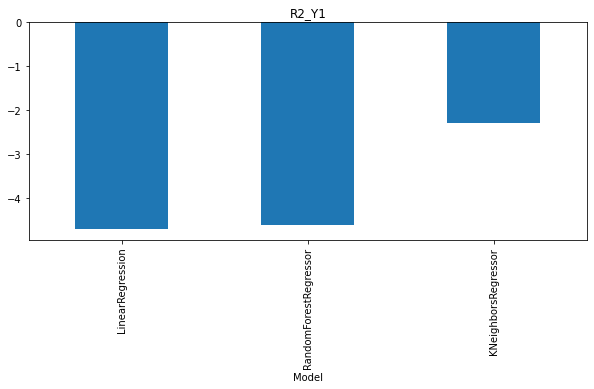

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10,4))
TestModels.R2_Y1.plot(kind='bar', title='R2_Y1');

## Инициализация моделей регрессий

In [ ]:
from sklearn.svm import NuSVR
from sklearn.linear_model import LinearRegression

def few_regressors(Xtrn, Ytrn, Xtest, Ytest):
    forest_data = RandomForestRegressor().fit(Xtrn, Ytrn)
    print(forest_data.score(Xtest, Ytest))



    knn = KNeighborsRegressor().fit(Xtrn, Ytrn)
    print(knn.score(Xtest, Ytest))

    ln = LinearRegression().fit(Xtrn, Ytrn)
    print(ln.score(Xtest, Ytest))

   
    
    return forest_data, knn, ln

In [ ]:
forest_data,  knn, ln = few_regressors(Xtrn, Ytrn, Xtest, Ytest)

-3.473715676296923
-2.477049805684823
-4.7001444723890655


In [ ]:
Xtrn_1 = pd.DataFrame(Xtrn, columns=['Price_gold', 'processnodes(nm)', 'tupe_ram', "maks_desktop_gb"])
Xtest_1 = pd.DataFrame(Xtest, columns=['Price_gold', 'processnodes(nm)', 'tupe_ram', "maks_desktop_gb"])
Ytrn_1 = pd.DataFrame(Ytrn, columns=['price_ram'])
Ytest_1 = pd.DataFrame(Ytest, columns=['price_ram'])


X_train_2_pd = Xtrn_1
X_test_2_pd = Xtest_1
X_train_3 = X_train_2_pd 
X_test_3 = X_test_2_pd

y_train_3 = Ytrn_1
y_test_3 = Ytest_1
print(X_train_3.head(3), "\n")
print(X_test_3.head(3), "\n")
print(y_train_3.head(3))
print(y_test_3.head(3))

   Price_gold  processnodes(nm)  tupe_ram  maks_desktop_gb
0     289.264             250.0       1.0              4.0
1     297.743             250.0       1.0              4.0
2     295.870             250.0       1.0              4.0 

   Price_gold  processnodes(nm)  tupe_ram  maks_desktop_gb
0    1243.068              22.0       4.0            128.0
1    1298.713              14.0       4.0            128.0
2    1336.560              14.0       4.0            128.0 

   price_ram
0   0.015585
1   0.015346
2   0.119474
   price_ram
0  -0.000793
1  -0.000793
2  -0.000595


In [ ]:
forest_data,  knn, lnn = few_regressors(X_train_3, y_train_3, X_test_3, y_test_3)

-3.893936264724899
-2.477049805684823
-4.7001444723890655


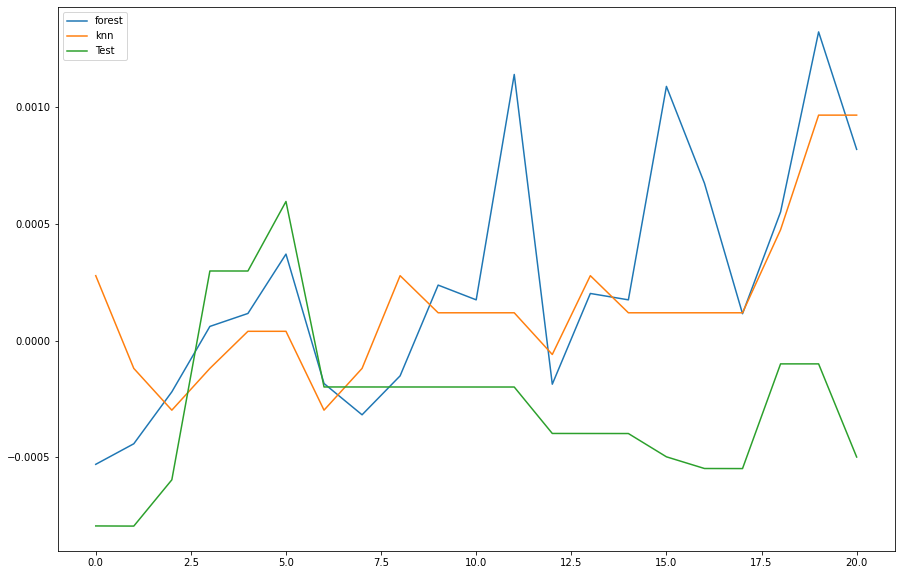

In [ ]:
fig = plt.figure(figsize = (15, 10))
# plt.plot(X_train_3.index, y_train_3, label='Train')
plt.plot(X_test_3.index, forest_data.predict(X_test_3), label="forest")

plt.plot(X_test_3.index, knn.predict(X_test_3), label="knn")

# plt.plot(X_test_3.index, ln.predict(X_test_3), label="lr")
plt.plot(X_test_3.index, y_test_3, label="Test")
plt.legend()
plt.show()

In [ ]:
X_train_4 = X_train_3 # Производная
X_test_4 = X_test_3

y_train_4 = Ytrn_1
y_test_4 = Ytest_1

print(X_train_3.head(3))
print()
print(y_train_3.head(3))

   Price_gold  processnodes(nm)  tupe_ram  maks_desktop_gb
0     289.264             250.0       1.0              4.0
1     297.743             250.0       1.0              4.0
2     295.870             250.0       1.0              4.0

   price_ram
0   0.015585
1   0.015346
2   0.119474


## График квадратичной ошибки

predicted=0.094077, expected=-0.282232
predicted=0.146496, expected=0.165156
predicted=0.028565, expected=0.023867
predicted=-0.049821, expected=-0.008432
predicted=0.014721, expected=0.052877
predicted=-0.001802, expected=-0.088868
predicted=-0.003466, expected=-0.000871
predicted=0.000849, expected=0.000847
predicted=-0.007259, expected=-0.007365
predicted=-0.003219, expected=0.004150
predicted=-0.008057, expected=-0.003734
predicted=-0.000740, expected=-0.000719
predicted=-0.000099, expected=-0.000066
predicted=0.001584, expected=0.001078
predicted=-0.002781, expected=0.000000
predicted=-0.000862, expected=-0.001027
predicted=-0.000011, expected=-0.000050
predicted=0.000403, expected=0.000323
predicted=0.000330, expected=-0.000793
predicted=-0.000198, expected=-0.000198
Test MSE: 0.004


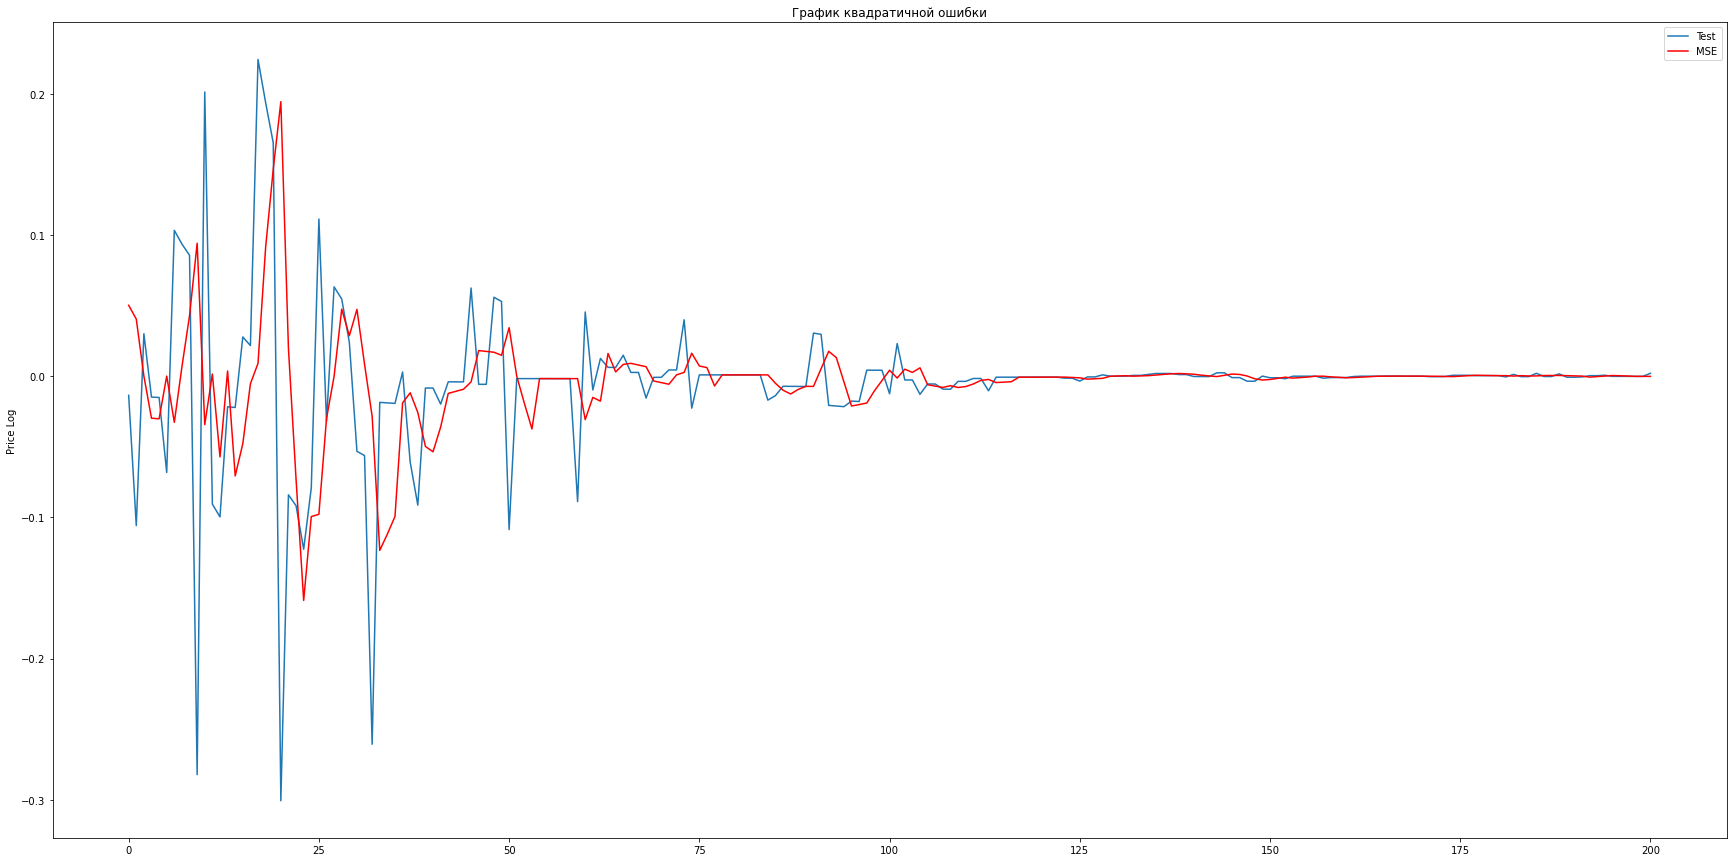

In [ ]:
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

# prepare situation
X = y_train_4.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))] # Тестовые данные
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    if len(predictions) % 10 == 0:
        print('predicted=%f, expected=%f' % (yhat, obs))

# Квадратичная ошибка
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

fig = plt.figure(figsize = (30, 15))

plt.plot(test, label='Test')
plt.plot(predictions, color='red', label = 'MSE')
plt.title('График квадратичной ошибки')
plt.xlabel('')
plt.ylabel('Price Log')
plt.legend();

# Приближение на графике
# zoom plot
# plt.plot(test[40:60])
# plt.plot(predictions[40:60], color='red')
# plt.title('')
# plt.show();

# Дифф. признаков

In [ ]:
X_train_3_diff, y_train_3_diff, X_test_3_diff, y_test_3_diff = X_train_3.diff(), y_train_3.diff(), X_test_3.diff(), y_test_3.diff()
X_train_3_diff, y_train_3_diff, X_test_3_diff, y_test_3_diff = X_train_3_diff.dropna(), y_train_3_diff.dropna(), X_test_3_diff.dropna(), y_test_3_diff.dropna()

-11066.005823867175
-11337.371393790967
-648.7344761927131


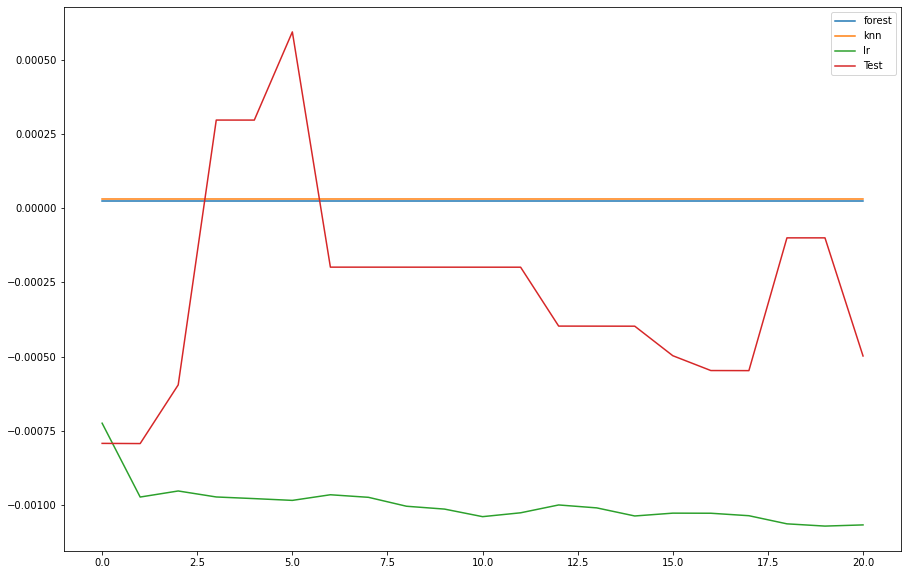

In [ ]:
forest_data,  knn, lnn = few_regressors(X_train_3_diff, y_train_3_diff, X_test_3_diff, y_test_3_diff)

fig = plt.figure(figsize = (15, 10))
# plt.plot(X_train_3.index, y_train_3, label='Train')
plt.plot(X_test_3.index, forest_data.predict(X_test_3), label="forest")

plt.plot(X_test_3.index, knn.predict(X_test_3), label="knn")

plt.plot(X_test_3.index, ln.predict(X_test_3), label="lr")
plt.plot(X_test_3.index, y_test_3, label="Test")
plt.legend()
plt.show()

In [ ]:
# <div class='alert class-block alert-warning'>
  
# </div>

In [ ]:
data = pd.read_csv('BigRamPrice2.csv', sep=';')
data = data.drop(['max_stick'], axis=1)
#, 'tupe_ram', 'max_stick', 'maks_desktop_gb']
data_1 = data.loc[:,'Date':'processnodes(nm)'].copy()
data_2 = data.loc[:,'tupe_ram':'maks_desktop_gb'].copy()

data = pd.concat([data_1, data_2], axis=1).dropna().drop(['Date'], axis=1).astype('float')
data_test = data['price_ram'].reset_index().drop(['index'], axis=1)
data = data.drop(['price_ram'], axis=1)
data = data.reset_index().drop(['index'], axis=1)
data

,Price_gold,processnodes(nm),tupe_ram,maks_desktop_gb
0,289.264,250.0,1.0,4.0
1,297.743,250.0,1.0,4.0
2,295.870,250.0,1.0,4.0
3,308.558,250.0,1.0,4.0
4,298.971,250.0,1.0,4.0
...,...,...,...,...
209,1182.248,14.0,4.0,128.0
210,1131.580,14.0,4.0,128.0
211,1117.525,14.0,4.0,128.0
212,1124.905,14.0,4.0,128.0


In [ ]:
data_final_train = data.loc[:190]
data_final_test = data.loc[190:]

test_final_train = data_test.loc[:190]
test_final_test = data_test.loc[190:] 

In [ ]:
data_test

,price_ram
0,0.91000
1,0.94000
2,0.97000
3,1.22000
4,1.19000
...,...
209,0.00505
210,0.00450
211,0.00440
212,0.00430


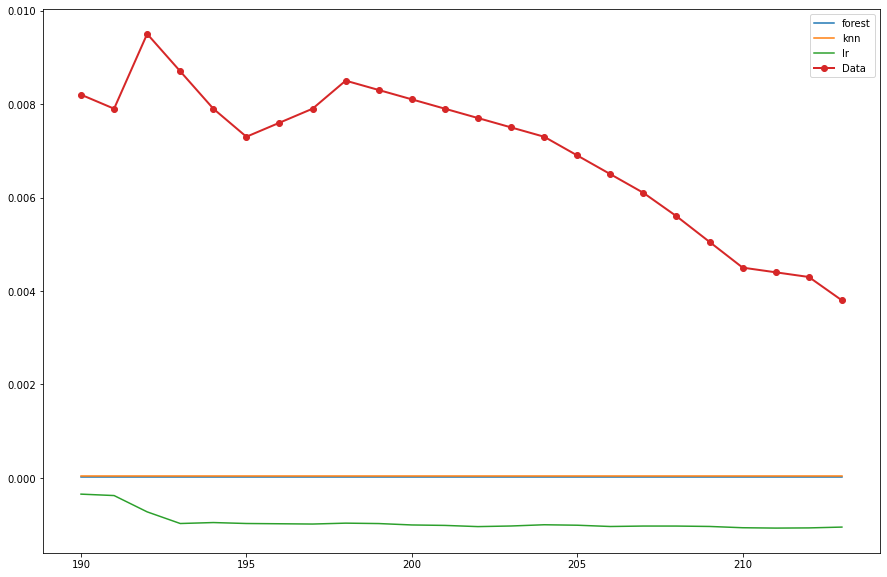

In [ ]:
forest_pred = forest_data.predict(data_final_test)  
knn_pred = knn.predict(data_final_test)  
lnn_pred = lnn.predict(data_final_test)  

ax = fig.add_subplot(122)
fig = plt.figure(figsize = (15, 10))

# plt.plot(X_train_3.index, y_train_3, label='Train')
plt.plot(data_final_test.index, forest_data.predict(data_final_test), label="forest")
plt.plot(data_final_test.index, knn.predict(data_final_test), label="knn")
plt.plot(data_final_test.index, ln.predict(data_final_test), label="lr")
plt.plot(test_final_test.index, test_final_test, label="Data", marker='o', linewidth='2')
# plt.xlim(150, 200)
# plt.ylim(-0.01, 0.05)
plt.legend()
plt.show()

In [ ]:
#создаем временные структуры
TestModels = DataFrame()
TestModelsPred = DataFrame()
tmp = {}

#для каждой модели из списка
for model in models:
    #получаем имя модели
    m = str(model)
    tmp['Model'] = m[:m.index('(')]    
    #для каждого столбцам результирующего набора
    for i in range(test_final_train.shape[0]):
        #обучаем модель
        model.fit(data_final_train, test_final_train) 
        #вычисляем коэффициент детерминации
        tmp['R2_Y%s'%str(i+1)] = r2_score(test_final_test, model.predict(data_final_test))
        pred = model.predict(data_final_test)
    #записываем данные и итоговый DataFrame
    pred = model.predict(data_final_test)
    TestModels = TestModels.append([tmp])
#делаем индекс по названию модели
TestModels.set_index('Model', inplace=True)

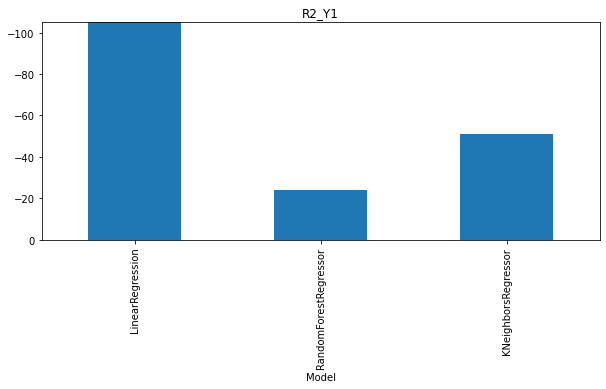

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10,4))
plt.ylim(0, -105)
TestModels.R2_Y1.plot(kind='bar', title='R2_Y1');